In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/RupeshMohan/Linear_Regression/master/headbrain.csv')
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
X = data["Head Size(cm^3)"].values.reshape(-1,1)
Y = data["Brain Weight(grams)"].values.reshape(-1,1)

In [4]:
X.shape,Y.shape

((237, 1), (237, 1))

In [5]:
data.isnull().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [29]:
m = 0
c = 0
L =  0.000000001
n = len(X)
for i in range(n):
    y_pred = m*X + c
    D_m = (-2/n)* sum(X*(Y-y_pred))
    D_c = (-2/n)* sum(Y-y_pred)
    m = m-L*D_m
    c = c-L*D_c
print(m,c)

[0.35154796] [9.7312315e-05]


In [30]:
y_pred = m*X+c


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [33]:
reg.fit(X_train, y_train)

LinearRegression()

In [34]:
print(reg.coef_,m)

[[0.26188776]] [0.35154796]


In [35]:
print(reg.intercept_,c)

[328.60141186] [9.7312315e-05]


In [36]:
def calc(slope, intercept, hours):
    return slope*hours+intercept

score = calc(m,c,X)
print(score) 

[[1586.18447752]
 [1314.08635911]
 [1497.94594041]
 [1327.79672941]
 [1468.41591206]
 [1260.29952175]
 [1330.60911307]
 [1251.15927487]
 [1270.14286453]
 [1399.86406052]
 [1210.37971191]
 [1403.73108804]
 [1279.63465936]
 [1479.31389871]
 [1347.13186703]
 [1362.59997712]
 [1229.36330157]
 [1218.46531491]
 [1088.04102301]
 [1555.24825734]
 [1363.30307303]
 [1422.36312974]
 [1337.28852424]
 [1304.24301632]
 [1668.79824732]
 [1554.89670938]
 [1418.84765018]
 [1413.92597878]
 [1214.24673943]
 [1467.71281614]
 [1331.31220898]
 [1334.47614059]
 [1442.40136327]
 [1462.79114475]
 [1461.73650088]
 [1340.80400381]
 [1239.90974026]
 [1317.60183867]
 [1172.06098464]
 [1227.60556178]
 [1392.83310139]
 [1232.17568522]
 [1516.92953007]
 [1337.28852424]
 [1358.02985368]
 [1418.14455426]
 [1514.46869437]
 [1112.64937997]
 [1279.98620732]
 [1281.04085119]
 [1367.87319647]
 [1333.42149672]
 [1501.10987202]
 [1428.339445  ]
 [1410.41049922]
 [1215.65293126]
 [1367.52164851]
 [1464.54888453]
 [1383.3413065

In [37]:
df_preds = pd.DataFrame({'Actual': Y.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

     Actual    Predicted
0      1530  1586.184478
1      1297  1314.086359
2      1335  1497.945940
3      1282  1327.796729
4      1590  1468.415912
..      ...          ...
232    1110  1129.875230
233    1215  1193.153862
234    1104  1136.554641
235    1170  1178.388848
236    1120  1192.099218

[237 rows x 2 columns]


In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,accuracy_score
mse = mean_squared_error(Y,y_pred)
rmse = np.sqrt(mse)
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean squared error: 6261.61
Root mean squared error: 79.13


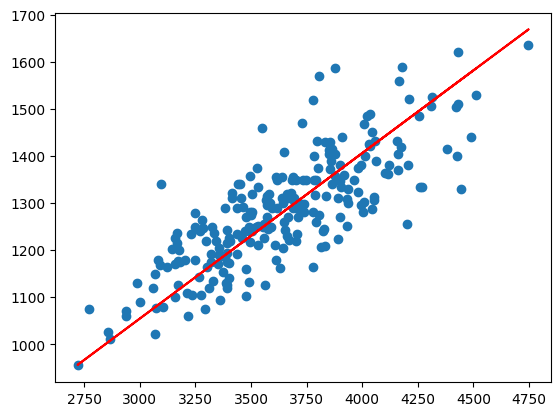

In [39]:
plt.scatter(X,Y)
plt.plot(X,y_pred,color='r')